ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl # error for excel file 

In [75]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np

df = pd.read_excel('Entertainer - Basic Info.xlsx')
df_1 = pd.read_excel('Entertainer - Breakthrough Info.xlsx')
df_2 = pd.read_excel('Entertainer - Last work Info.xlsx')

In [76]:
df_2.isnull().sum()

Entertainer                            0
Year of Last Major Work (arguable)     0
Year of Death                         40
dtype: int64

In [77]:
df_1.isnull().sum() # Year of First Oscar/Grammy/Emmy   6
df_1['Year of First Oscar/Grammy/Emmy'].unique()

array([2009., 1999., 1968., 1935., 1976., 1962., 1940.,   nan, 1970.,
       1929., 1934., 1981., 1989., 1964., 1995., 1980., 1956., 2001.,
       1987., 1959., 1946., 1971., 1988., 1954., 1951., 1955., 2002.,
       1992., 1941., 1965., 2004., 1933., 2006., 1996., 2010., 2016.,
       1993., 1991., 1953., 2005., 1986., 1984., 2017., 1973., 1963.])

# with NaN replace does't work 

In [78]:
df.duplicated().sum(),df.duplicated().sum(),df_2.duplicated().sum()

(0, 0, 0)

In [79]:
int(df_1['Year of First Oscar/Grammy/Emmy'].mode()[0])

1962

In [80]:
df_1['Year of First Oscar/Grammy/Emmy'] = np.where(df_1['Year of First Oscar/Grammy/Emmy'].isna(),int(df_1['Year of First Oscar/Grammy/Emmy'].mode()[0]),df_1['Year of First Oscar/Grammy/Emmy'])

In [81]:
# if dat in float use pd.tonumeric before astype
df_1['Year of First Oscar/Grammy/Emmy'] = pd.to_numeric(df_1['Year of First Oscar/Grammy/Emmy'], errors='coerce').astype('Int64')

In [82]:
df_1.dtypes

Entertainer                                     object
Year of Breakthrough/#1 Hit/Award Nomination     int64
Breakthrough Name                               object
Year of First Oscar/Grammy/Emmy                  Int64
dtype: object

In [83]:
df_2['Year of Death'] = np.where(df_2['Year of Death'].isna(), 0 ,df_2['Year of Death'])

In [84]:
df_2.isnull().sum()  # Year of Death 40

Entertainer                           0
Year of Last Major Work (arguable)    0
Year of Death                         0
dtype: int64

In [85]:
df_3 = pd.merge(pd.merge(df,df_1, how = 'left', on = 'Entertainer'), df_2, how = 'left', on = 'Entertainer')
df_3 = df_3.drop('Year of Death', axis = 1)
df_3.head(1)

,Entertainer,Gender (traditional),Birth Year,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy,Year of Last Major Work (arguable)
0,Adele,F,1988,2008,19,2009,2016


In [86]:
df_3.rename(columns={
    'Entertainer': 'actor',
    'Gender (traditional)': 'gender',
    'Birth Year': 'dob',
    'Year of Breakthrough/#1 Hit/Award Nomination': 'year_of_Nomination',
    'Breakthrough Name': 'breakthrough_name',
    'Year of First Oscar/Grammy/Emmy': '1st_award_year',
    'Year of Last Major Work (arguable)': 'last_work_year'
}, inplace=True)

In [87]:
df_3.head(1)

,actor,gender,dob,year_of_Nomination,breakthrough_name,1st_award_year,last_work_year
0,Adele,F,1988,2008,19,2009,2016


In [88]:
col = df_3.drop('actor', axis = 1).columns[df_3.drop('actor', axis = 1).dtypes == 'object'].to_list()
col

['gender', 'breakthrough_name']

In [89]:
df_3['year_of_Nomination'].isnull().sum()

0

In [90]:
df_3['breakthrough_name'].nunique()

69

In [91]:
df_3.shape

(70, 7)

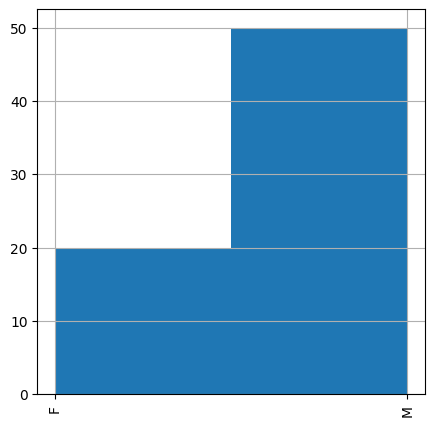

In [92]:
plt.figure(figsize=(5,5))
x = plt.hist(df_3['gender'], bins = df_3['gender'].nunique())
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [93]:
df_3['actor'].nunique()

70

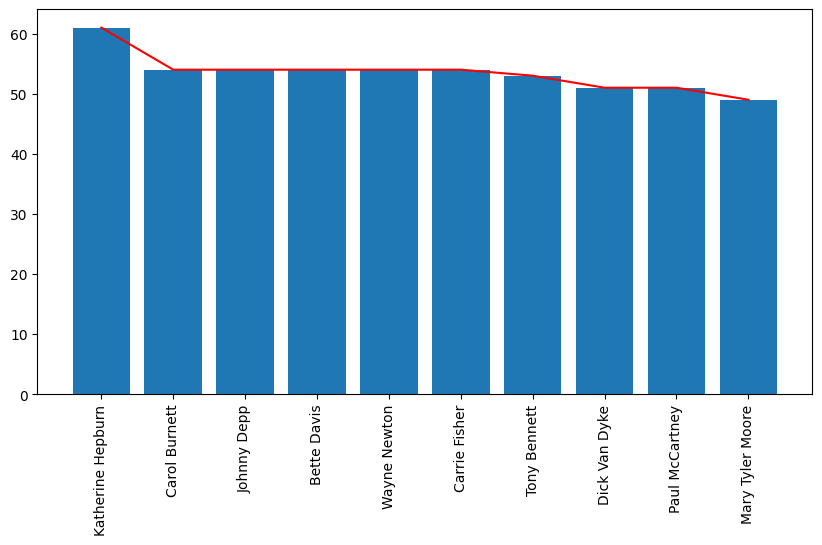

In [94]:
# actors with top 10 longest career span 
df_3['career_span'] = df_3['last_work_year'] - df_3['1st_award_year']
longest_careers = df_3[['actor', 'career_span']]
x_ = df_3[['actor','career_span']][df_3['career_span'].values > 0].sort_values(by='career_span', ascending=False)
x = x_.head(10)

plt.figure(figsize=(10,5))
plt.bar(x= x['actor'],  height = x['career_span'])
plt.plot(x['actor'],x['career_span'], c = 'r')
plt.xticks(rotation = 90)
plt.show()

In [95]:
x['actor'].unique()

array(['Katherine Hepburn', 'Carol Burnett', 'Johnny Depp', 'Bette Davis',
       'Wayne Newton', 'Carrie Fisher', 'Tony Bennett', 'Dick Van Dyke',
       'Paul McCartney', 'Mary Tyler Moore'], dtype=object)

In [96]:
x = x[x['career_span'] > x['career_span'].mean()]

In [97]:
x['actor'].unique()

array(['Katherine Hepburn', 'Carol Burnett', 'Johnny Depp', 'Bette Davis',
       'Wayne Newton', 'Carrie Fisher'], dtype=object)

In [98]:
x

,actor,career_span
42,Katherine Hepburn,61
7,Carol Burnett,54
40,Johnny Depp,54
3,Bette Davis,54
67,Wayne Newton,54
9,Carrie Fisher,54


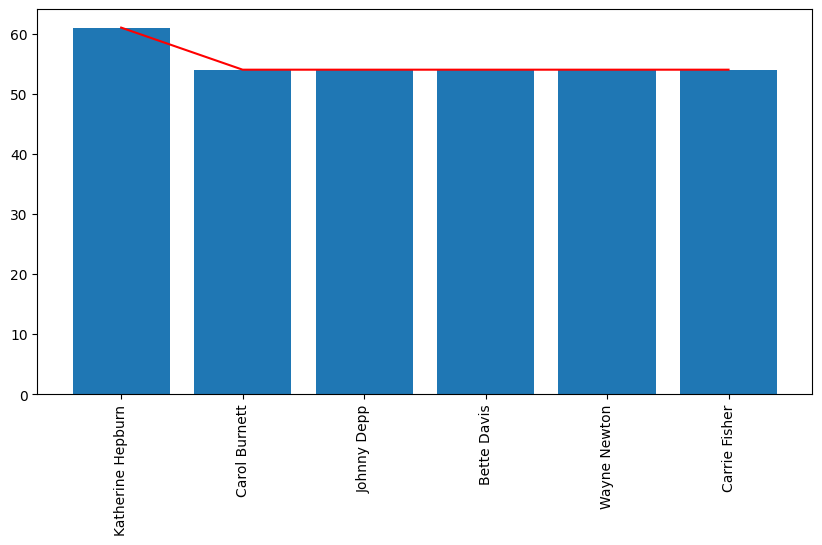

In [99]:
plt.figure(figsize=(10,5))
plt.bar(x= x['actor'],  height = x['career_span'])
plt.plot(x['actor'],x['career_span'], c = 'r')
plt.xticks(rotation = 90)
plt.show()

In [100]:
# Identify actors who have been nominated more than once
nominations_count = df_3.groupby('actor')['year_of_Nomination'].count().reset_index()
multiple_nominations = nominations_count[nominations_count['year_of_Nomination'] > 1]
print(multiple_nominations)

Empty DataFrame
Columns: [actor, year_of_Nomination]
Index: []


In [101]:
# Sort actors by breakthrough year and get the most recent one
most_recent_breakthrough = df_3[['actor', 'breakthrough_name', '1st_award_year']].sort_values(by='1st_award_year', ascending=False).head(1)
print(most_recent_breakthrough)

        actor breakthrough_name  1st_award_year
63  Sly Stone   Everyday People            2017


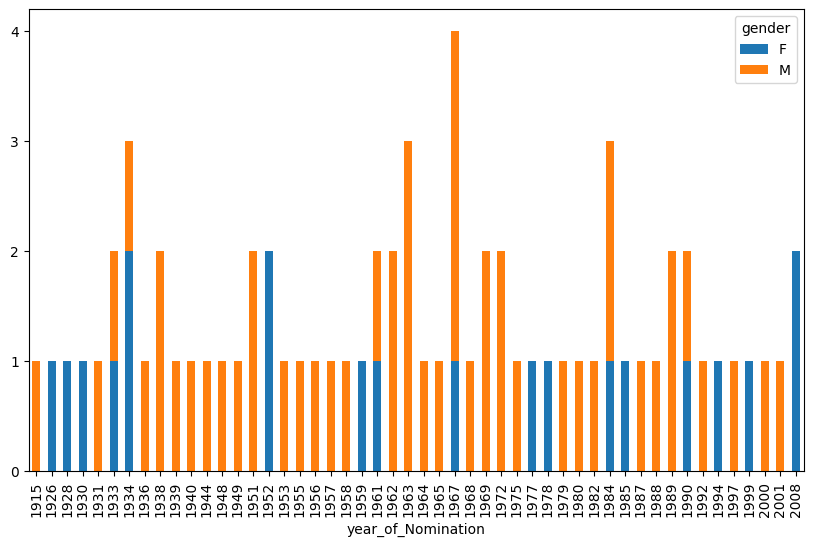

In [102]:
# Analyze gender representation across nomination years
gender_over_time = df_3.groupby(['year_of_Nomination', 'gender']).size().unstack().fillna(0)
gender_over_time.plot(kind='bar', stacked=True, figsize=(10,6))
plt.yticks(ticks= range(0,5))
plt.show()

In [103]:
# Find the actors with the most nominations
nomination_counts = df_3['actor'].value_counts()
print(nomination_counts)

actor
Adele               1
Kirk Douglas        1
Mariah Carey        1
Madonna             1
Louis Armstrong     1
                   ..
Humphrey Bogart     1
James Dean          1
Jay Leno            1
Jennifer Aniston    1
Willie Nelson       1
Name: count, Length: 70, dtype: int64


In [104]:
# Find the youngest and oldest actors at the time of nomination
youngest_nominee = df_3[['actor', 'year_of_Nomination']].sort_values(by='year_of_Nomination').head(1)
oldest_nominee = df_3[['actor', 'year_of_Nomination']].sort_values(by='year_of_Nomination', ascending=False).head(1)
print(f"1st nominee: {youngest_nominee}")
print(f"Latest nominee: {oldest_nominee}")

1st nominee:               actor  year_of_Nomination
11  Charlie Chaplin                1915
Latest nominee:    actor  year_of_Nomination
0  Adele                2008


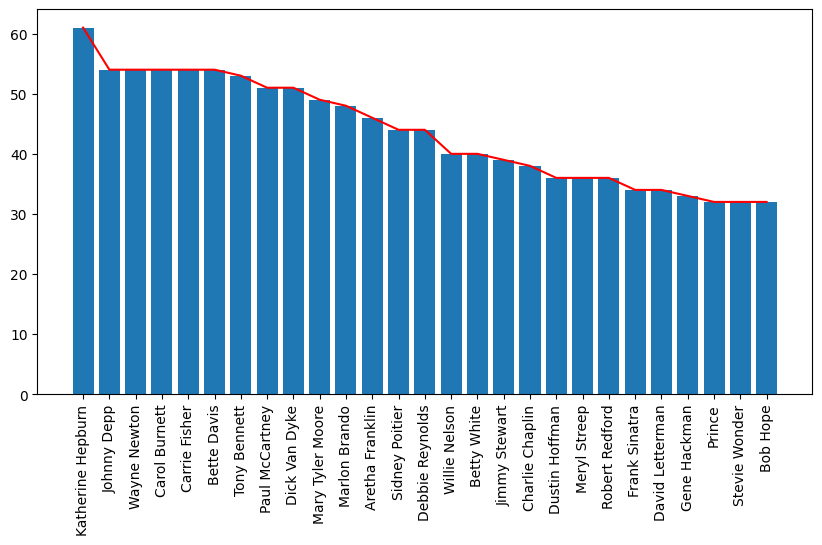

In [105]:
# Filter actors whose career spans more than 30 years 

long_career_actors = df_3[df_3['career_span'] > 30]
x = long_career_actors[['actor', 'career_span']].sort_values(by='career_span', ascending = False)

plt.figure(figsize=(10,5))
plt.bar(x= x['actor'], height = x['career_span'])
plt.plot(x['actor'],x['career_span'], c = 'r')
plt.xticks(rotation = 90)
plt.show()

In [106]:
x['actor'].unique()

array(['Katherine Hepburn', 'Johnny Depp', 'Wayne Newton',
       'Carol Burnett', 'Carrie Fisher', 'Bette Davis', 'Tony Bennett',
       'Paul McCartney', 'Dick Van Dyke', 'Mary Tyler Moore',
       'Marlon Brando', 'Aretha Franklin', 'Sidney Poitier',
       'Debbie Reynolds', 'Willie Nelson', 'Betty White', 'Jimmy Stewart',
       'Charlie Chaplin', 'Dustin Hoffman', 'Meryl Streep',
       'Robert Redford', 'Frank Sinatra', 'David Letterman',
       'Gene Hackman', 'Prince', 'Stevie Wonder', 'Bob Hope'],
      dtype=object)

<Axes: title={'center': 'Nominations by Decade'}, xlabel='decade_of_Nomination'>

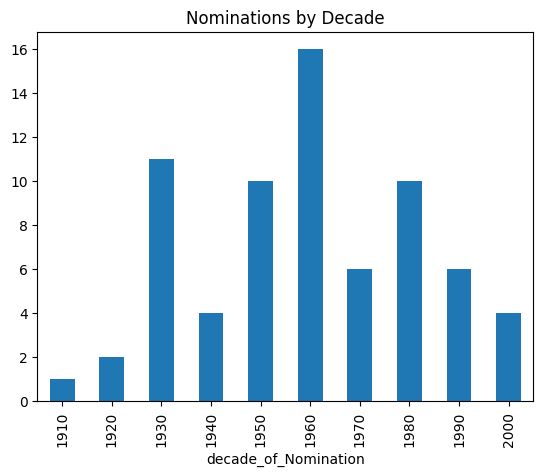

In [107]:
# Analyze the trend of nominations by decade
df_3['decade_of_Nomination'] = (df_3['year_of_Nomination'] // 10) * 10
nomination_trend = df_3['decade_of_Nomination'].value_counts().sort_index()
nomination_trend.plot(kind='bar', title='Nominations by Decade')

In [108]:
df_3

,actor,gender,dob,year_of_Nomination,breakthrough_name,1st_award_year,last_work_year,career_span,decade_of_Nomination
0,Adele,F,1988,2008,19,2009,2016,7,2000
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999,2016,17,1990
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968,2014,46,1960
3,Bette Davis,F,1908,1934,Of Human Bondage,1935,1989,54,1930
4,Betty White,F,1922,1952,Life with Elilzabeth,1976,2016,40,1950
...,...,...,...,...,...,...,...,...,...
65,Tom Hanks,M,1956,1984,Splash,1993,2016,23,1980
66,Tony Bennett,M,1926,1951,Because of You,1963,2016,53,1950
67,Wayne Newton,M,1942,1972,"Daddy, Don't You Walk So Fast",1962,2016,54,1970
68,Will Smith,M,1968,1990,The Fresh Prince of Bel-Air,1988,2016,28,1990
